### Ensemble Classifiers: Random Forest and ADA Boost

#### Two families of ensemble methods are usually distinguished:

* In <b>averaging methods</b>s, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. Examples: Bagging methods, Forests of randomized trees, …

* By contrast, in <b>boosting methods</b>, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. Examples: AdaBoost, Gradient Tree Boosting, …

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import titanic data using pandas

Modified version of the "Titanic" data can be found at: http://http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/titanic-trimmed.csv. Original unmodified Titanic data is available at <a href="http://lib.stat.cmu.edu/S/Harrell/data/ascii/titanic.txt">CMU StatLib</a>.

In [3]:
url = "http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/titanic-trimmed.csv"
titanic = pd.read_csv(url)
titanic.head(10)

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1st,1,female,29.0,0,0,211.337494,Southampton
1,2,1st,1,male,NaN,1,2,151.550003,Southampton
2,3,1st,0,female,2.0,1,2,151.550003,Southampton
3,4,1st,0,male,30.0,1,2,151.550003,Southampton
4,5,1st,0,female,25.0,1,2,151.550003,Southampton
5,6,1st,1,male,48.0,0,0,26.549999,Southampton
6,7,1st,1,female,63.0,1,0,77.958298,Southampton
7,8,1st,0,male,39.0,0,0,0.000000,Southampton
8,9,1st,1,female,53.0,2,0,51.479198,Southampton
9,10,1st,0,male,71.0,0,0,49.504200,Cherbourg


In [4]:
titanic.describe(include="all")

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309,1309.000000,1309,1045.000000,1309.000000,1309.000000,1308.000000,1307
unique,NaN,3,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,3rd,NaN,male,NaN,NaN,NaN,NaN,Southampton
freq,NaN,709,NaN,843,NaN,NaN,NaN,NaN,914
mean,655.000000,NaN,0.381971,NaN,29.908852,0.498854,0.385027,33.295479,NaN
std,378.020061,NaN,0.486055,NaN,14.392485,1.041658,0.865560,51.758669,NaN
min,1.000000,NaN,0.000000,NaN,0.166700,0.000000,0.000000,0.000000,NaN
25%,328.000000,NaN,0.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,655.000000,NaN,0.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,982.000000,NaN,1.000000,NaN,39.000000,1.000000,0.000000,31.275000,NaN


#### Handling missing variables

In [5]:
titanic[titanic.age.isnull()].shape

(264, 9)

In [6]:
age_mean = titanic.age.mean()
titanic.age.fillna(age_mean, axis=0, inplace=True)
titanic.dropna(axis=0, inplace=True)

In [7]:
titanic.shape

(1306, 9)

In [8]:
titanic.set_index('pid', drop=True, inplace=True)
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pid,,,,,,,,
1,1st,1,female,29.000000,0,0,211.337494,Southampton
2,1st,1,male,29.908852,1,2,151.550003,Southampton
3,1st,0,female,2.000000,1,2,151.550003,Southampton
4,1st,0,male,30.000000,1,2,151.550003,Southampton
5,1st,0,female,25.000000,1,2,151.550003,Southampton


In [9]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,1306.0,0.381317,0.485896,0.0000,0.0000,0.000000,1.000,1.000000
age,1306.0,29.854661,12.812320,0.1667,22.0000,29.908852,35.000,80.000000
sibsp,1306.0,0.500000,1.042580,0.0000,0.0000,0.000000,1.000,8.000000
parch,1306.0,0.385911,0.866357,0.0000,0.0000,0.000000,0.000,9.000000
fare,1306.0,33.223956,51.765986,0.0000,7.8958,14.454200,31.275,512.329224


In [10]:
titanic_ssf = pd.get_dummies(titanic)
titanic_ssf.head(10)

,survived,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,,
1,1,29.000000,0,0,211.337494,1,0,0,1,0,0,0,1
2,1,29.908852,1,2,151.550003,1,0,0,0,1,0,0,1
3,0,2.000000,1,2,151.550003,1,0,0,1,0,0,0,1
4,0,30.000000,1,2,151.550003,1,0,0,0,1,0,0,1
5,0,25.000000,1,2,151.550003,1,0,0,1,0,0,0,1
6,1,48.000000,0,0,26.549999,1,0,0,0,1,0,0,1
7,1,63.000000,1,0,77.958298,1,0,0,1,0,0,0,1
8,0,39.000000,0,0,0.000000,1,0,0,0,1,0,0,1
9,1,53.000000,2,0,51.479198,1,0,0,1,0,0,0,1


In [11]:
titanic_names = titanic_ssf.columns.values
titanic_names

array(['survived', 'age', 'sibsp', 'parch', 'fare', 'pclass_1st',
       'pclass_2nd', 'pclass_3rd', 'sex_female', 'sex_male',
       'embarked_Cherbourg', 'embarked_Queenstown',
       'embarked_Southampton'], dtype=object)

In [12]:
y = titanic_ssf['survived']
X = titanic_ssf[titanic_names[1:]]
X.head()

,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,
1,29.000000,0,0,211.337494,1,0,0,1,0,0,0,1
2,29.908852,1,2,151.550003,1,0,0,0,1,0,0,1
3,2.000000,1,2,151.550003,1,0,0,1,0,0,0,1
4,30.000000,1,2,151.550003,1,0,0,0,1,0,0,1
5,25.000000,1,2,151.550003,1,0,0,1,0,0,0,1


#### Build the training and testing dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#### A versatile function to measure performance of a model

In [14]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

#### Let's now compare performance of standard decision tree classifier against some ensemble methods: Random Forest Classifier and Ada Boost.

In [15]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(X_train, y_train)

In [16]:
from sklearn import metrics
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.733 



In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=33)
rf = rf.fit(X_train, y_train)

In [18]:
measure_performance(X_test, y_test, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.775 



#### Exploring and comparing model parameters

In [19]:
print(rf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 33, 'verbose': 0, 'warm_start': False}


#### Let's use our "calc_params" function to explore the impact of individual parameters using cross-validation

In [20]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

#### Now we can explore the impact of 'min_samples_leaf' more systematically

In [21]:
msl = range(1,6)
print(msl)

range(1, 6)


min_samples_leaf = 1 Train = 0.9588121364925651 Test = 0.7748895841001104
min_samples_leaf = 2 Train = 0.8948752256253044 Test = 0.7845049687154951
min_samples_leaf = 3 Train = 0.8675784316534397 Test = 0.7959974236290025
min_samples_leaf = 4 Train = 0.8491384694725381 Test = 0.7749217887375782
min_samples_leaf = 5 Train = 0.840278772598344 Test = 0.7864326463010672


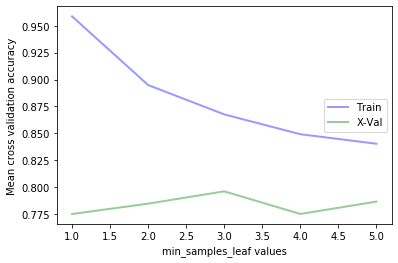

In [22]:
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, msl, 'min_samples_leaf', 5)

##### Seems that min_sample_leaf = 3 works well in this case. Let's now try varying tree max depths

max_depth = 1 Train = 0.7806529524682692 Test = 0.7806772175193227
max_depth = 2 Train = 0.7808924734263532 Test = 0.7806772175193227
max_depth = 3 Train = 0.8014835400968398 Test = 0.7816341553183659
max_depth = 4 Train = 0.8170498237973813 Test = 0.8007867132867134
max_depth = 5 Train = 0.8295037675844483 Test = 0.7959882223040117
max_depth = 6 Train = 0.8496169383720596 Test = 0.7988498343761501
max_depth = 7 Train = 0.8690161304185885 Test = 0.7969497607655501
max_depth = 8 Train = 0.8864957167005703 Test = 0.7844957673905043


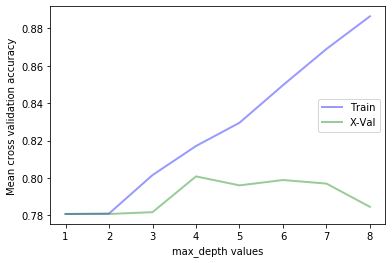

In [23]:
m_depth = [1,2,3,4,5,6, 7, 8]

rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, m_depth, 'max_depth', 5)

##### Looks like the best max_depth values is 4. Let's now try varying the number of estimators in the ensemble

In [24]:
nest = range(5, 101, 5)
print(nest)

range(5, 101, 5)


n_estimators = 5 Train = 0.9468389536716042 Test = 0.7729711078395288
n_estimators = 10 Train = 0.9588121364925651 Test = 0.7748895841001104
n_estimators = 15 Train = 0.9664762341346016 Test = 0.7806450128818551
n_estimators = 20 Train = 0.9693501991232847 Test = 0.7816157526683842
n_estimators = 25 Train = 0.9719834971205914 Test = 0.7844911667280089
n_estimators = 30 Train = 0.9722233045869982 Test = 0.7796972764078027
n_estimators = 35 Train = 0.9727020599948428 Test = 0.7797064777327936
n_estimators = 40 Train = 0.9731808154026875 Test = 0.7777834008097166
n_estimators = 45 Train = 0.9734203363607712 Test = 0.7749125874125874
n_estimators = 50 Train = 0.9736592843022089 Test = 0.7797064777327936
n_estimators = 55 Train = 0.9738990917686158 Test = 0.7816203533308796
n_estimators = 60 Train = 0.9741383262183765 Test = 0.7797064777327936
n_estimators = 65 Train = 0.9743778471764605 Test = 0.7816249539933751
n_estimators = 70 Train = 0.9743778471764605 Test = 0.7787541405962459
n_estim

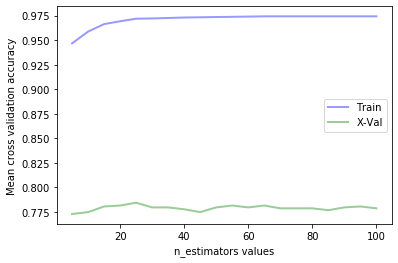

In [25]:
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, nest, 'n_estimators', 5)

##### Not a bif difference, but 25 works well.. Let's build and test our final model with these parameters

In [26]:
rf = RandomForestClassifier(n_estimators=25, min_samples_leaf=3, max_depth=4)
rf = rf.fit(X_train, y_train)

measure_performance(X_test, y_test, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.828 



#### We can also observe the importance of each feature

In [27]:
rf.feature_importances_

array([0.05655435, 0.02765146, 0.02699922, 0.11930172, 0.04203995,
       0.01813962, 0.08796809, 0.17231559, 0.4224699 , 0.00922121,
       0.00428852, 0.01305037])

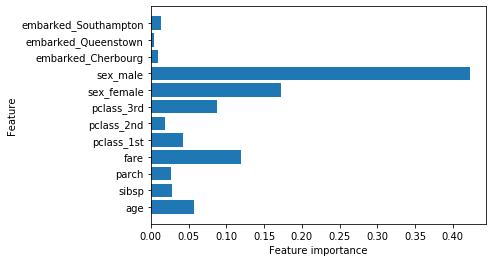

In [28]:
def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

features = titanic_names[1:]
plot_feature_importances(rf, len(features), features)

#### And we can access each of the 25 estimators

In [29]:
rf.estimators_[:3]

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=3, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=164787005, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=3, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=322546684, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                        max_features='auto', max_leaf_nodes=None,
                        min_

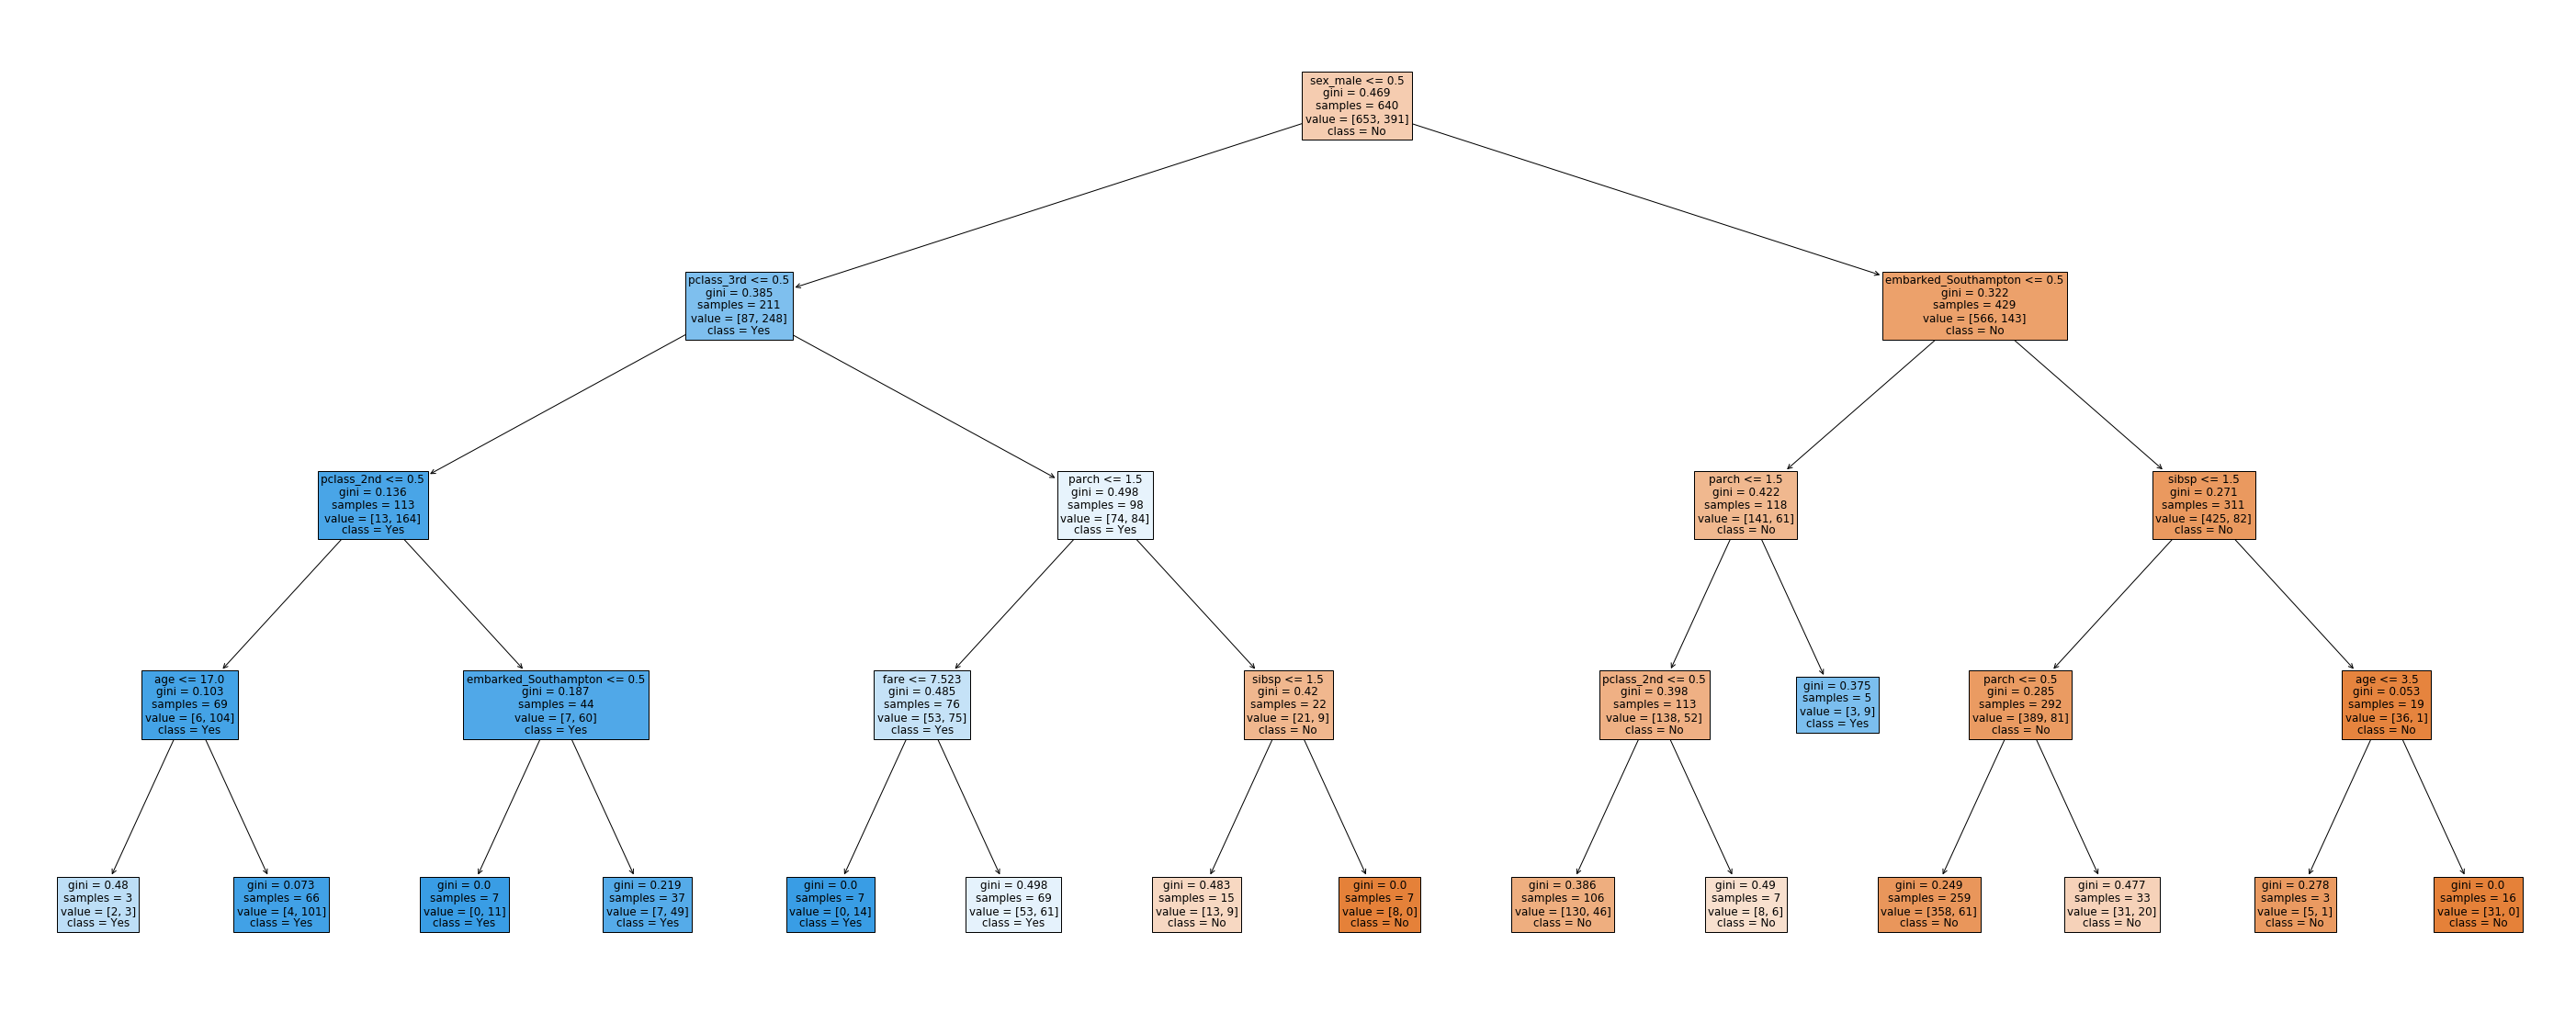

In [30]:
fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(rf.estimators_[0], feature_names=features, class_names=["No","Yes"], filled=True, ax=ax);

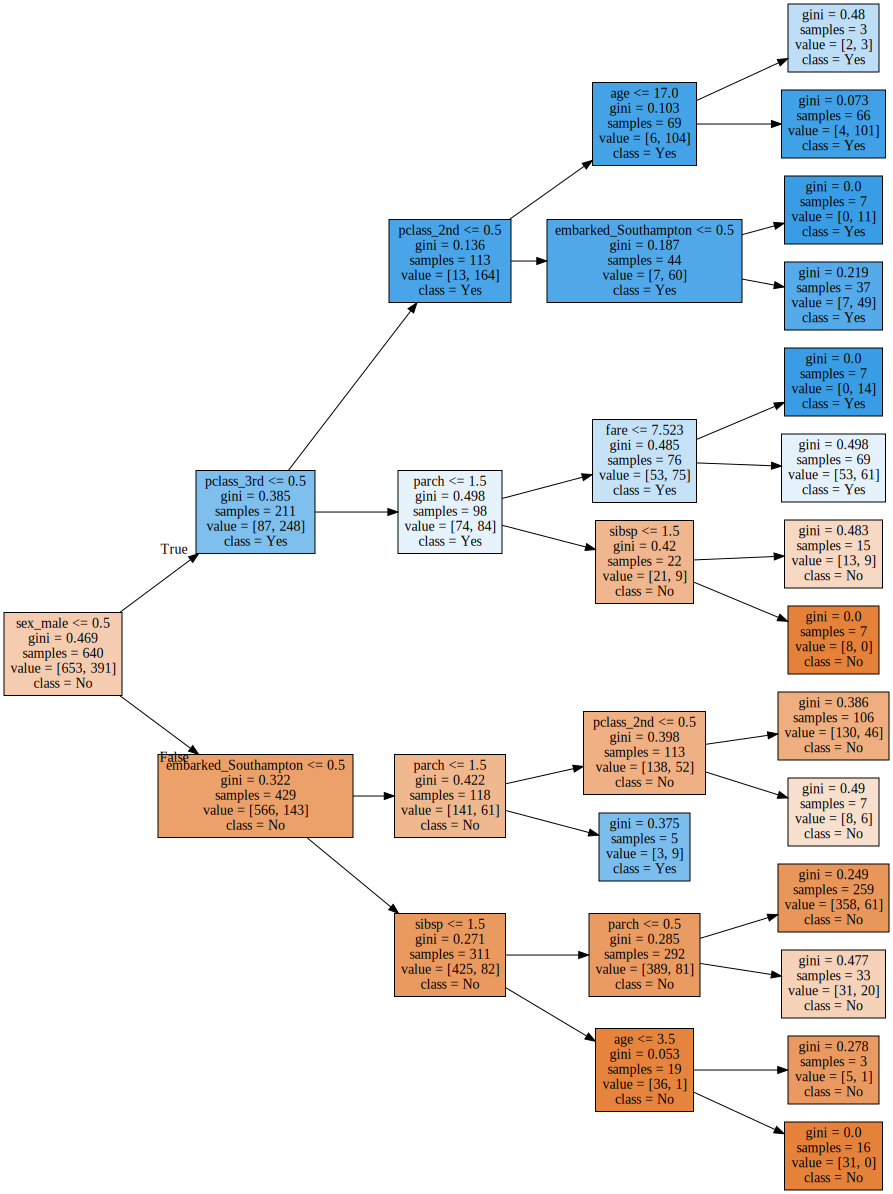

In [31]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(rf.estimators_[0],out_file=None, feature_names=features, 
                           class_names=["No","Yes"], filled=True, rotate=True)
graph = graphviz.Source(dot_data)
graph

#import pydotplus
#from sklearn.externals.six import StringIO 
#from IPython.display import Image

#dot_data = StringIO()
#export_graphviz(rf.estimators_[0],out_file=dot_data, feature_names=features, class_names=["Yes","No"])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#Image(graph.create_png())

### Ada Boost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
ab = AdaBoostClassifier()
ab = ab.fit(X_train, y_train)

In [34]:
measure_performance(X_test, y_test, ab, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.782 



n_estimators = 5 Train = 0.7880760966106066 Test = 0.7730033124769967
n_estimators = 10 Train = 0.798613872733003 Test = 0.7959836216415164
n_estimators = 15 Train = 0.8017264991548005 Test = 0.7883327199116673
n_estimators = 20 Train = 0.803642666819471 Test = 0.7940881486934119
n_estimators = 25 Train = 0.8074747156404894 Test = 0.7826002944423998
n_estimators = 30 Train = 0.8105861960289946 Test = 0.7806726168568274
n_estimators = 35 Train = 0.8115442798613299 Test = 0.7797156790577844
n_estimators = 40 Train = 0.8125023636936654 Test = 0.7797202797202797
n_estimators = 45 Train = 0.8132209265679169 Test = 0.7806726168568274
n_estimators = 50 Train = 0.814418817866659 Test = 0.7806726168568274
n_estimators = 55 Train = 0.8151368077242644 Test = 0.7787541405962459
n_estimators = 60 Train = 0.8141795834168981 Test = 0.7816249539933751
n_estimators = 65 Train = 0.8158547975818697 Test = 0.7873803827751196
n_estimators = 70 Train = 0.8156149901154629 Test = 0.7787541405962459
n_estimato

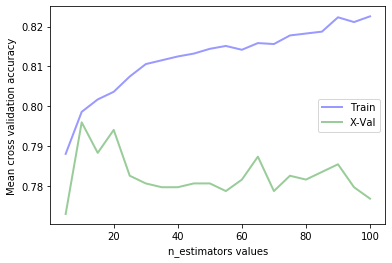

In [35]:
train_scores, test_scores = calc_params(X_train, y_train, ab, nest, 'n_estimators', 5)

In [36]:
ab = AdaBoostClassifier(n_estimators=10)
ab = ab.fit(X_train, y_train)
measure_performance(X_test, y_test, ab, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.782 



#### Learning rate shrinks the contribution of each classifier by "learning_rate". There is a trade-off between "learning_rate" and "n_estimators"

In [37]:
lr = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0, 1.3, 1.5, 1.8, 2.0]

learning_rate = 0.01 Train = 0.7806529524682692 Test = 0.7806772175193227
learning_rate = 0.05 Train = 0.7806529524682692 Test = 0.7806772175193227
learning_rate = 0.1 Train = 0.7864000229206658 Test = 0.7816387559808612
learning_rate = 0.2 Train = 0.7988531071827636 Test = 0.788328119249172
learning_rate = 0.3 Train = 0.8012471707303097 Test = 0.7902465955097535
learning_rate = 0.4 Train = 0.8031636249033035 Test = 0.7883419212366581
learning_rate = 0.6 Train = 0.8077125175486348 Test = 0.7883419212366581
learning_rate = 0.7 Train = 0.8079526115233648 Test = 0.7835618329039382
learning_rate = 0.8 Train = 0.807953471048334 Test = 0.7845141700404857
learning_rate = 0.9 Train = 0.8105873420622869 Test = 0.7892988590357012
learning_rate = 1.0 Train = 0.814418817866659 Test = 0.7806726168568274
learning_rate = 1.3 Train = 0.8184875225625305 Test = 0.7950404858299596
learning_rate = 1.5 Train = 0.8187276165372603 Test = 0.7854711078395289
learning_rate = 1.8 Train = 0.8098684926797123 Test 

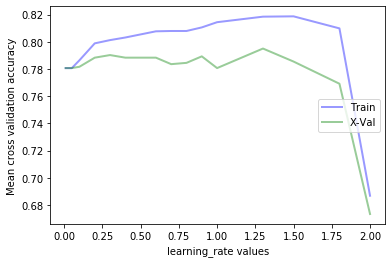

In [38]:
ab = AdaBoostClassifier()
train_scores, test_scores = calc_params(X_train, y_train, ab, lr, 'learning_rate', 5)

In [39]:
ab = AdaBoostClassifier(learning_rate=1.3)
ab = ab.fit(X_train, y_train)
measure_performance(X_test, y_test, ab, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.786 



#### Let's use grid search to explore the parameter space more systematically

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
ab = AdaBoostClassifier()

In [42]:
parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0, 1.3, 1.5, 1.8, 2.0],
    'n_estimators': range(5, 101, 5),
}

gs = GridSearchCV(ab, parameters, cv=3)

In [43]:
%time _ = gs.fit(X_train, y_train)

Wall time: 1min 6s


C:\Users\Bamshad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
gs.best_params_, gs.best_score_

({'learning_rate': 1.3, 'n_estimators': 20}, 0.789272030651341)

#### Our final AdaBoost model;

In [45]:
ab = AdaBoostClassifier(n_estimators=20, learning_rate=1.3)
ab = ab.fit(X_train, y_train)
measure_performance(X_test, y_test, ab, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.794 



#### Let's try a couple of other boosting and bagging enssemble classifiers

##### The following is an example of using Gradient Boosted Decision Trees. GBDT is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective procedure that can be used for both regression and classification.

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gb = GradientBoostingClassifier(n_estimators=45, learning_rate=1.0,
                                 max_depth=3, random_state=0).fit(X_train, y_train)

In [48]:
gb.score(X_test, y_test)

0.8129770992366412

##### In scikit-learn, bagging methods are offered as a unified BaggingClassifier meta-estimator (resp. BaggingRegressor), taking as input a user-specified base estimator along with parameters specifying the strategy to draw random subsets. For example, the following is a bagging ensemble of KNeighborsClassifier base estimators, each built on random subsets of 50% of the samples and 50% of the features.

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5,
                           n_estimators=25, random_state=5)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=25, n_jobs=None,
                  oob_score=False, random_state=5, verbose=0, warm_start=False)

In [50]:
bagging.score(X_test, y_test)

0.816793893129771